# Multi-label prediction with Planet Amazon dataset

In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
path = Config.data_path()/'planet'

In [10]:
df = pd.read_csv(path/'train_v2.csv')

In [11]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [16]:
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg').random_split_by_pct(0.2).label_from_df(label_delim=' '))

In [17]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

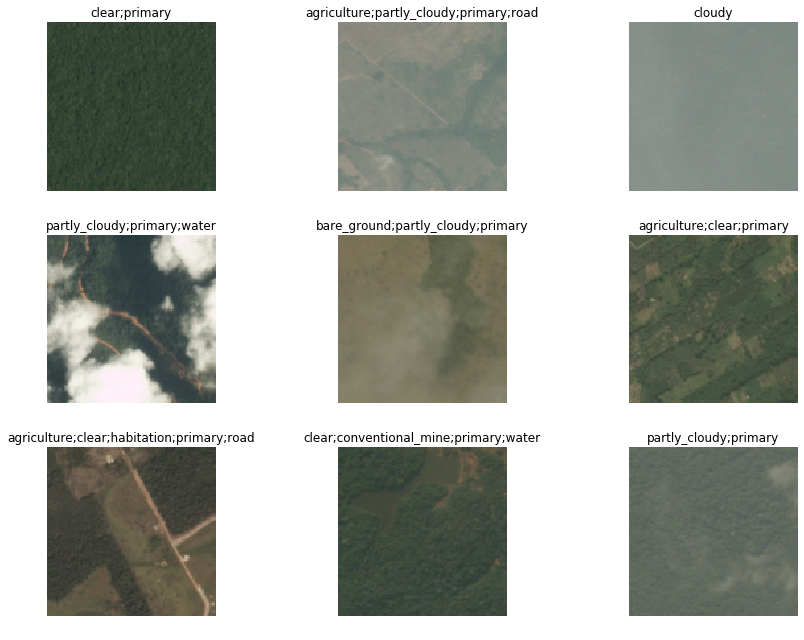

In [18]:
data.show_batch(rows=3, figsize=(12,9))

In [29]:
arch = models.resnet50

In [30]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta,thresh=0.2)
learn = create_cnn(data,arch,metrics=[acc_02,f_score])

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


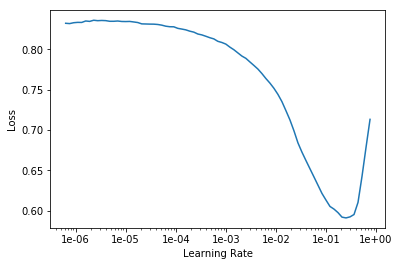

In [32]:
learn.recorder.plot()

In [33]:
lr = 0.01

In [34]:
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.126322,0.112433,0.945050,0.898830
2,0.109808,0.097202,0.951807,0.913905
3,0.101784,0.090851,0.956110,0.921080
4,0.092159,0.087640,0.957883,0.923832
5,0.093601,0.086482,0.956480,0.925292


In [38]:
learn.save('stage1')

In [39]:
learn.unfreeze()

In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


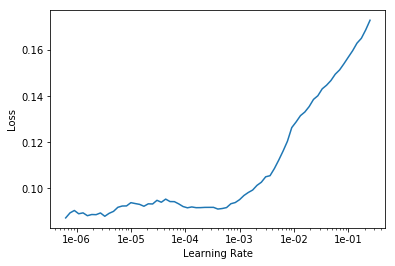

In [41]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(5,slice(1e-5,lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.098399,0.090092,0.951597,0.920747
2,0.097283,0.088809,0.956313,0.921446
3,0.093750,0.085439,0.957861,0.924349
4,0.083321,0.082374,0.959278,0.927787
5,0.080807,0.081555,0.958747,0.929383


In [43]:
learn.save('stage-2')

In [44]:
learn.unfreeze()

In [45]:
data = (src.transform(tfms,size=256).databunch().normalize(imagenet_stats))

In [46]:
learn.data= data

In [48]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


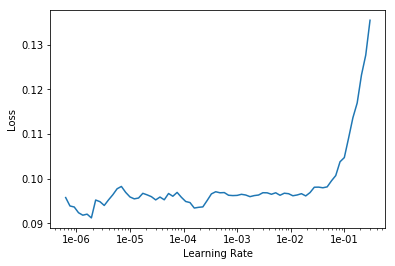

In [49]:
learn.lr_find()
learn.recorder.plot()

In [50]:
lr=1e-2/2

In [51]:
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.088299,0.083574,0.956015,0.926953
2,0.086789,0.083842,0.957548,0.927053
3,0.083503,0.082543,0.958609,0.926841
4,0.082437,0.080374,0.958973,0.929150
5,0.080013,0.080287,0.958994,0.930610


In [52]:
learn.save('stage-1-256-rn50')

In [53]:
learn.unfreeze()

In [54]:
learn.fit_one_cycle(5,slice(1e-5,lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.082393,0.082966,0.958580,0.928437
2,0.086287,0.083083,0.957563,0.927558
3,0.082778,0.081837,0.957882,0.929166
4,0.076428,0.080460,0.959961,0.931104
5,0.075161,0.079970,0.960942,0.931286


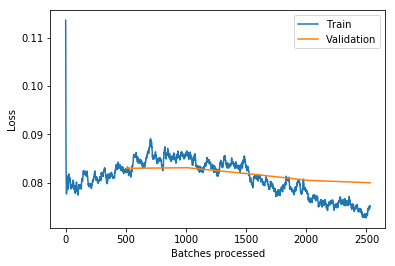

In [55]:
learn.recorder.plot_losses()

In [59]:
learn.save('stage-2-256-rn50')

In [60]:
learn.export()